# Mini projeto 1 - PANDAS - Exploração e Análise de Dados - EDA

Nesse projeto trabalharemos com dados fictícios de investidores.

São 3 arquivos que devem ser carregados para responder as perguntas abaixo.

O projeto pode ser feito em até 4 integrantes

Para a entrega, coloque o notebook respondido no seu github (um por grupo) ou, em último caso, salvar o notebook e enviar via chat do class.

| Nome                                | Nota |
|-------------------------------------|------|
|                                     |      |
|                                     |      |
|                                     |      |
|                                     |      |

Informações

Cadastro:
- **id** : Identificação do investidor
- **Nome** : Nome completo do investidor 
- **Sexo** : Feminino ou masculino
- **Nasc** : Data de nascimento
- **Idade** : Idade do investidor ou responsável
- **Email** : E-mail do investidor ou responsável
- **Lat_long** : Dados geográficos do investidor
- **Job** : Profissão do investidor ou do seu responsável (em inglês)
- **Estado** : Estado onde o investidor reside

Investimento:
- **id** : Identificação do investidor
- **Salario** : Renda do investidor ou seu responsável
- **Perfil** : Perfil de investimento
- **Ativo01, Ativo02, Ativo03, Ativo04, Ativo05, Ativo06, Ativo07** : O quanto de dinheiro o investidor colocou em cada ativo
- **Nota1, Nota2** : O quanto o investidor está satisfeito com nossa empresa (2 avaliações)

Lembrando que esses dados são irreais e fictícios


Arquivo cadastro.csv

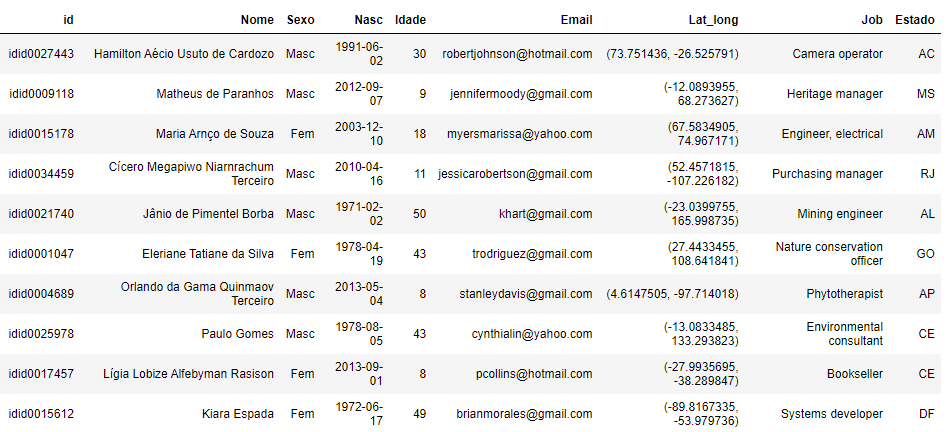

Arquivo investimento.csv (dividido em 2 partes)

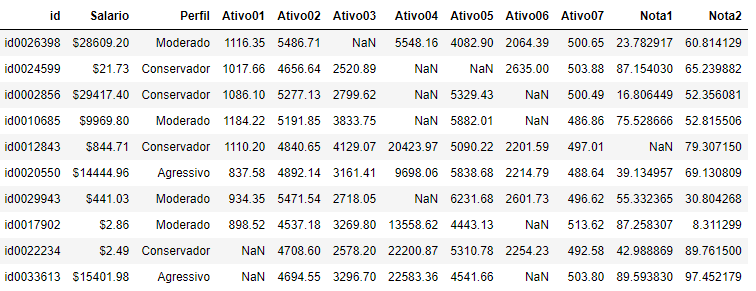

Os arquivos estão no link:
    
https://github.com/renatapink/DSdegree/tree/master/Modulo2/Mini_projeto1
    
Pode ser feito o download e carregar localmente ou pode acessar os arquivos pelo link diretamente no pandas:
    
- https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/cadastro.csv
- https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/investimento_parte1.csv
- https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/investimento_parte2.csv

## 1 - Carregar os arquivos de cadastro, investimento1 e investimento2, e mostrar a quantidade de linhas de cada um, além das informações desses dataframes (por exemplo, o tipo dos dados das coluna)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
#!pip install missingno
import missingno as msno
pd.options.display.max_columns = 35 #para aumentar a quantidade de colunas a serem visualizadas

In [45]:
cd = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/cadastro.csv')
iv1 = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/investimento_parte1.csv')
iv2 = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto1/investimento_parte2.csv')

In [46]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38754 entries, 0 to 38753
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        38754 non-null  object
 1   Nome      38754 non-null  object
 2   Sexo      38754 non-null  object
 3   Nasc      38754 non-null  object
 4   Idade     38754 non-null  int64 
 5   Email     38754 non-null  object
 6   Lat_long  38754 non-null  object
 7   Job       38754 non-null  object
 8   Estado    38754 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


In [47]:
iv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       20000 non-null  object 
 1   Salario  20000 non-null  object 
 2   Perfil   20000 non-null  object 
 3   Ativo01  15012 non-null  float64
 4   Ativo02  16857 non-null  float64
 5   Ativo03  16760 non-null  float64
 6   Ativo04  13799 non-null  float64
 7   Ativo05  16829 non-null  float64
 8   Ativo06  9895 non-null   float64
 9   Ativo07  20000 non-null  float64
 10  Nota1    18469 non-null  float64
 11  Nota2    18954 non-null  float64
dtypes: float64(9), object(3)
memory usage: 1.8+ MB


In [48]:
iv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24052 entries, 0 to 24051
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       24052 non-null  object 
 1   Salario  24052 non-null  object 
 2   Perfil   24052 non-null  object 
 3   Ativo01  17994 non-null  float64
 4   Ativo02  20245 non-null  float64
 5   Ativo03  20249 non-null  float64
 6   Ativo04  16685 non-null  float64
 7   Ativo05  20211 non-null  float64
 8   Ativo06  11932 non-null  float64
 9   Ativo07  24052 non-null  float64
 10  Nota1    22172 non-null  float64
 11  Nota2    22810 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.2+ MB


## 2 - Juntar os dataframes de investimento1 e investimento2 em um só e ver a quantidade de linhas

Criar um novo dataframe  
Dica: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [49]:
df = pd.concat([iv1, iv2], axis=0)

## 3 - Crie um novo dataframe eliminando as linhas duplicadas do item anterior

In [50]:
df = df.drop_duplicates()
df.shape

(38754, 12)

## 4 - Junte o dataframe de investimento com o de cadastro, criando um novo dataframe
Dica: use a coluna id como chave para juntar os dois dataframes

In [51]:
df = pd.merge(cd, df, on='id', how='left')
df.shape

(38754, 20)

In [52]:
df.head(2)

,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620
1,id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871


## 5 - Ordene o dataframe pelo id, de forma crescente e redefina o índice

In [53]:
df = df.sort_values(by=['id'], ascending=True)
df.head(3)

,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Salario,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2
0,id0000001,Eunice Hellen do Vale,Fem,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,NaN,4480.91,2329.72,480.72,79.600372,9.802620
1,id0000002,Sebastião Castelo Branco Júnior,Masc,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,NaN,5624.22,2669.98,504.17,44.406893,90.512871
2,id0000003,Romildo Fábio de Carvalho,Masc,2015-12-28,6,walkermichael@yahoo.com,"(Decimal('-28.2161525'), Decimal('97.140529'))","Development worker, international aid",DF,$62497.64,Agressivo,818.81,5516.52,3396.64,NaN,5033.83,2229.45,523.12,44.020024,65.060941


## 6 - Faça uma análise dos dados faltantes e trate-os

Mostre todas as colunas com dados faltantes, sua quantidade/porcentagem e como tratar (preencher) cada uma delas explicando sua estratégia

In [54]:
#6.1 - Mostrando a quantidade de valores faltantes em cada coluna
df.isnull().sum()

id              0
Nome            0
Sexo            0
Nasc            0
Idade           0
Email           0
Lat_long        0
Job             0
Estado          0
Salario         0
Perfil          0
Ativo01      9724
Ativo02      6100
Ativo03      6169
Ativo04     11887
Ativo05      6191
Ativo06     19514
Ativo07         0
Nota1        3000
Nota2        2000
dtype: int64

In [55]:
# Mostrando a porcentagem de valores faltantes em cada coluna
df.isnull().sum()/df.shape[0]*100

id           0.000000
Nome         0.000000
Sexo         0.000000
Nasc         0.000000
Idade        0.000000
Email        0.000000
Lat_long     0.000000
Job          0.000000
Estado       0.000000
Salario      0.000000
Perfil       0.000000
Ativo01     25.091603
Ativo02     15.740311
Ativo03     15.918357
Ativo04     30.672963
Ativo05     15.975125
Ativo06     50.353512
Ativo07      0.000000
Nota1        7.741136
Nota2        5.160758
dtype: float64

In [56]:
df_novo = df
# Estrategia adotada: substituindo os dados nulos pelo numero 0 pois entendemos que o investidor nao aplicoda neste ativo
df_novo['Ativo01'].fillna(0.0, inplace=True) 
df_novo['Ativo02'].fillna(0.0, inplace=True)
df_novo['Ativo03'].fillna(0.0, inplace=True)
df_novo['Ativo04'].fillna(0.0, inplace=True)
df_novo['Ativo05'].fillna(0.0, inplace=True)
df_novo['Ativo06'].fillna(0.0, inplace=True)
df_novo['Ativo07'].fillna(0.0, inplace=True)

In [57]:
# Estrategia adotada: substituindo os dados nulos pelo numero 51 para que o investidor seja classificado com neutro
df_novo['Nota1'].fillna(51, inplace=True) 
df_novo['Nota2'].fillna(51, inplace=True)

<AxesSubplot:>

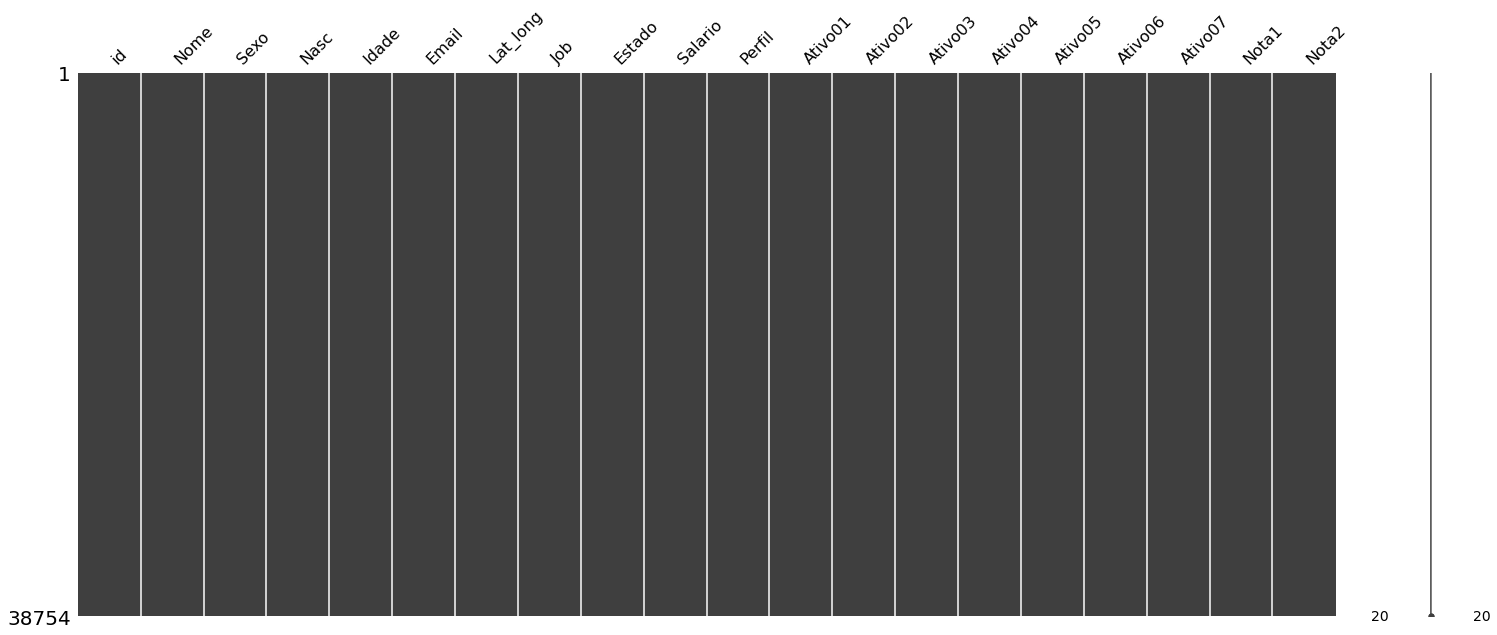

In [59]:
msno.matrix(df_novo)

## 7 - Manipule os dados a seguir:
- Criar coluna "Total" somando o valor de todos os ativos por investidor
- Criar coluna "Media" com a média das notas 1 e 2
- Criar coluna "Dominio" com apenas o domínio do email (dica: separar por @)
- Mudar o nome da coluna "Salário" para "Renda" e tratar a coluna (sem caracter $ e tipo numérica)
- Mudar os dados da coluna "Sexo" para Masculino e Feminino (tente usar a função map)
- Transformar os dados da coluna Media em inteiro
- Criar coluna "NPS" onde o investidor é classificado como promotor se a média das notas é maior ou igual a 80, como neutro se a média estiver entre 50 e 80, e como detrator se for abaixo de 50


In [60]:
#7.1 - Criar coluna "Total" somando o valor de todos os ativos por investidor
df['Total'] = df.iloc[:,11:18].sum(axis=1)
df[['Total']].head(1)

,Total
0,16084.84


In [61]:
#7.2 - Criar coluna "Media" com a média das notas 1 e 2

'''
Decidi usar vamor 51 para as médias que ficaram vázias pelos seguintes motivos:
- Entendi que eles eram indiferentes a empresa, nem satisfeitos, nem insatisfeitos

'''


df['Media'] = df.loc[:,['Nota1','Nota2']].mean(axis=1)
df['Media'] = df['Media'].replace(np.nan, int(51))
df[['Media']].head(1)

,Media
0,44.701496


In [62]:
#7.3 - Criar coluna "Dominio" com apenas o domínio do email (dica: separar por @)
df[['EndEmail', 'DominioDoEmail']] = df['Email'].str.split('@', n=-2, expand=True)
df.drop(['EndEmail'], axis=1, inplace=True)
df[['DominioDoEmail']].head(1)

,DominioDoEmail
0,yahoo.com


In [63]:
#7.4 - Mudar o nome da coluna "Salário" para "Renda" e tratar a coluna (sem caracter $ e tipo numérica)
df.rename(columns={'Salario':'Renda'}, inplace=True)
df[['Renda']].head(1)

,Renda
0,$63.67


#

In [64]:
#7.5 - Mudar os dados da coluna "Sexo" para Masculino e Feminino (tente usar a função map)
def sexo(x):
    if x == 'Fem':
        return 'Feminino'
    elif x == 'Masc':
        return 'Masculino'

df[['Sexo']] = df[['Sexo']].applymap(sexo)
df[['Sexo']].head(2)

,Sexo
0,Feminino
1,Masculino


In [65]:
#7.6 - Transformar os dados da coluna Media em inteiro
df['Media'] = df['Media'].astype('int64')
df['Media'].dtypes

dtype('int64')

In [66]:
#Criar coluna "NPS" onde o investidor é classificado como promotor se a média das notas é maior ou igual a 80, como neutro se a média estiver entre 50 e 80, e como detrator se for abaixo de 50

'''
#########  OPÇÃO DE CÓDIGO     ##########

df.loc[df['Media'] >= 50, 'NPS']= 'neutro'
df.loc[df['Media'] < 50, 'NPS'] = 'detrator'
df.loc[df['Media'] >= 80, 'NPS'] = 'promotor'
'''

def perfil(x):
    if x >=50 and x < 80:
        return 'Neutro'
    elif x < 50:
        return 'Detrator'
    elif x > 80:
        return 'Promotor'

df[['NPS']] = df[['Media']].applymap(perfil)
df[['NPS']].head(3)

,NPS
0,Detrator
1,Neutro
2,Neutro


## 8 - Calcule os seguintes dados
- Calcule o total investido em cada coluna Ativo (tente usar o apply)
- Qual o menor valor investido em cada ativo?
- Mostre a média e desvio padrão de cada ativo
- Qual o nome e a idade do investidor mais velho?
- Qual a mediana da coluna Média?

In [67]:
# 8.1 -  Calcule o total investido em cada coluna Ativo
df.iloc[:,11:18].apply(np.sum, axis=0)

Ativo01    3.275569e+07
Ativo02    1.680798e+08
Ativo03    1.023306e+08
Ativo04    4.071340e+08
Ativo05    1.720668e+08
Ativo06    4.462684e+07
Ativo07    1.937903e+07
dtype: float64

In [68]:
#8.2 - Qual o menor valor investido em cada ativo?
df.iloc[:,11:18].apply(np.min, axis=0)

Ativo01      0.00
Ativo02      0.00
Ativo03      0.00
Ativo04      0.00
Ativo05      0.00
Ativo06      0.00
Ativo07    462.93
dtype: float64

In [69]:
#8.3.1 - Mostre a média de cada ativo
df.iloc[:,11:18].apply(np.mean, axis=0)

Ativo01      845.220878
Ativo02     4337.095701
Ativo03     2640.515840
Ativo04    10505.598580
Ativo05     4439.975773
Ativo06     1151.541631
Ativo07      500.052452
dtype: float64

In [70]:
#8.3.2 - Mostre o desvio padrão de cada ativo
df.iloc[:,11:18].apply(np.std, axis=0)

Ativo01     524.561757
Ativo02    1909.931254
Ativo03    1204.849149
Ativo04    9084.597495
Ativo05    2068.638915
Ativo06    1172.044060
Ativo07       9.998089
dtype: float64

In [71]:
#8.4 - Qual o nome e a idade do investidor mais velho?
df.loc[df['Idade'] == df['Idade'].max(), ['Idade', 'Nome']]

,Idade,Nome
0,51,Eunice Hellen do Vale
30,51,Jeniffer Vanessa de Fraga Rata
58,51,Emanoel Uion
87,51,Ronaldo da Silva do Paraná
135,51,Danilo da Paraíba
...,...,...
38478,51,Yeda Rosângela Rodrigues Torres
38521,51,Otto Victor Eirnige
38544,51,Marta Arlete Schneider Marques de Iglesias
38626,51,Marina Fátima Guerra


In [72]:
#8.5 - Qual a mediana da coluna Média?
df['Media'].median()

49.0

## 9 - Responder as perguntas abaixo

- Quantos investidores são agressivos, moderados e conservadores?
- Mostre os 10 primeiros ids dos investidores de perfil Agressivo e Moderado.
- Quantos investidores são do sexo feminino?
- Quantos investidores investiram mais de 16000 no Ativo04?
- Quantos investidores investiram mais de 16000 no Ativo04 e menos de 5000 no Ativo05?
- Quais investidores do sexo feminino tem mais de 25 anos e seu investimento total foi menor que 10000? 
- Quantos investidores tem em cada estado (dica: use groupby)
- Qual é a soma do total investido por cada estado?
- Qual é a média do total investido por promotores, detratores e neutros? E como se dividem nos estados
- Crie 3 colunas "dummies" do perfil dos investidores


- Crie uma tabela com total de investimentos de promotores, detratores e neutros em função do perfil. (dica: use pivot_table)

## 9 - Responder as perguntas abaixo

- Quantos investidores são agressivos, moderados e conservadores?
- Mostre os 10 primeiros ids dos investidores de perfil Agressivo e Moderado.
- Quantos investidores são do sexo feminino?
- Quantos investidores investiram mais de 16000 no Ativo04?
- Quantos investidores investiram mais de 16000 no Ativo04 e menos de 5000 no Ativo05?
- Quais investidores do sexo feminino tem mais de 25 anos e seu investimento total foi menor que 10000? 
- Quantos investidores tem em cada estado (dica: use groupby)
- Qual é a soma do total investido por cada estado?
- Qual é a média do total investido por promotores, detratores e neutros? E como se dividem nos estados
- Crie 3 colunas "dummies" do perfil dos investidores


- Crie uma tabela com total de investimentos de promotores, detratores e neutros em função do perfil. (dica: use pivot_table)

In [73]:
df['Perfil']

0           Moderado
1           Moderado
2          Agressivo
3          Agressivo
4        Conservador
            ...     
38749       Moderado
38750       Moderado
38751      Agressivo
38752    Conservador
38753       Moderado
Name: Perfil, Length: 38754, dtype: object

In [74]:
#9.1 - Quantos investidores são agressivos, moderados e conservadores?
#df.groupby(['Perfil'])['Perfil'].count()
df[['Perfil']].groupby('Perfil').size()

Perfil
Agressivo      12975
Conservador    12879
Moderado       12900
dtype: int64

In [75]:
#9.2 - - Mostre os 10 primeiros ids dos investidores de perfil Agressivo e Moderado.
cabeca = df[df['Perfil'] != 'Conservador' ][['id', 'Perfil']].head(10)
cauda = df[df['Perfil'] != 'Conservador' ][['id', 'Perfil']].tail(10)
print(cabeca,'\n'*3, cauda, sep=' ')

           id     Perfil
0   id0000001   Moderado
1   id0000002   Moderado
2   id0000003  Agressivo
3   id0000004  Agressivo
5   id0000006  Agressivo
6   id0000007   Moderado
7   id0000008  Agressivo
8   id0000009  Agressivo
9   id0000010  Agressivo
10  id0000011   Moderado 


               id     Perfil
38741  id0038742  Agressivo
38742  id0038743   Moderado
38743  id0038744   Moderado
38746  id0038747   Moderado
38747  id0038748   Moderado
38748  id0038749  Agressivo
38749  id0038750   Moderado
38750  id0038751   Moderado
38751  id0038752  Agressivo
38753  id0038754   Moderado


In [76]:
#9.3 - Quantos investidores são do sexo feminino?
df[df['Sexo'] == 'Feminino'].groupby('Sexo')['Sexo'].count()

Sexo
Feminino    19385
Name: Sexo, dtype: int64

In [77]:
#9.3 - Quantos investidores investiram mais de 16000 no Ativo04?
len(df[df['Ativo04'] > 16000])

10689

In [78]:
#9.4 - Quantos investidores investiram mais de 16000 no Ativo04 e menos de 5000 no Ativo05?
len(df[(df['Ativo04'] > 16000) & (df['Ativo05'] < 5000)])

5374

In [79]:
#9.5 - Quais investidores do sexo feminino tem mais de 25 anos e seu investimento total foi menor que 10000?
df[(df['Sexo'] == 'Feminino') & (df['Idade'] > 25) & (df['Total'] > 10000)]

,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Renda,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2,Total,Media,DominioDoEmail,NPS
0,id0000001,Eunice Hellen do Vale,Feminino,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,0.00,4480.91,2329.72,480.72,79.600372,9.802620,16084.84,44,yahoo.com,Detrator
3,id0000004,Lana Albina de Lemos Mumy,Feminino,1993-05-03,28,cobbangela@hotmail.com,"(Decimal('-40.8557635'), Decimal('-2.936099'))",Estate manager/land agent,DF,$99878.74,Agressivo,0.00,5258.69,3723.10,0.00,5933.91,0.00,486.05,25.597924,86.548918,15401.75,56,hotmail.com,Neutro
4,id0000005,Rose Elisângela Vyrnium de Moura,Feminino,1984-06-10,37,crawfordcraig@yahoo.com,"(Decimal('-20.2620885'), Decimal('104.349223'))",Chartered public finance accountant,MS,$188.01,Conservador,1505.16,6415.30,3462.67,30841.35,6044.86,2198.89,512.98,14.463307,33.566292,50981.21,24,yahoo.com,Detrator
14,id0000015,Shirley Magali dos Santos Ilil Brasil,Feminino,1985-09-25,36,ulevine@yahoo.com,"(Decimal('53.713752'), Decimal('-26.655324'))","Engineer, aeronautical",PA,$52421.54,Moderado,1187.21,5349.16,3253.68,8638.89,5151.24,0.00,492.34,41.598180,15.227546,24072.52,28,yahoo.com,Detrator
18,id0000019,Hellen de Teixeira Ezelimman,Feminino,1991-05-31,30,bakermichael@gmail.com,"(Decimal('-68.426187'), Decimal('-3.374860'))","Designer, industrial/product",AC,$7049.67,Moderado,986.04,4609.29,3679.42,18080.02,7146.23,0.00,507.71,51.000000,62.656956,35008.71,56,gmail.com,Neutro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38738,id0038739,Celina Faeima,Feminino,1981-12-04,40,garyluna@gmail.com,"(Decimal('44.091570'), Decimal('73.962037'))","Conservation officer, nature",AP,$63.99,Moderado,1281.25,5684.06,2849.14,17078.58,4830.44,0.00,500.59,0.396150,52.045951,32224.06,26,gmail.com,Detrator
38739,id0038740,Diana Andréia Gizsiu,Feminino,1984-11-11,37,johnrussell@gmail.com,"(Decimal('-39.972015'), Decimal('-118.995689'))",Medical physicist,ES,$43.10,Conservador,1139.09,4922.99,0.00,6060.50,4517.58,2102.05,509.65,51.000000,57.935261,19251.86,54,gmail.com,Neutro
38740,id0038741,Fabíola do Paraná Vaoal,Feminino,1972-01-05,49,ycarlson@yahoo.com,"(Decimal('70.075201'), Decimal('100.066811'))",Chartered public finance accountant,MA,$330.19,Agressivo,0.00,4752.65,0.00,0.00,5343.93,2244.89,496.97,9.345647,35.839981,12838.44,22,yahoo.com,Detrator
38742,id0038743,Michele Cecília Brasil de Freitas,Feminino,1986-10-03,35,kim25@hotmail.com,"(Decimal('0.6676755'), Decimal('-96.744816'))",Translator,MS,$15668.49,Moderado,866.16,5419.12,3195.57,12875.06,4123.92,2047.02,489.82,73.318733,92.181903,29016.67,82,hotmail.com,Promotor


In [80]:
#9.6 - Quantos investidores tem em cada estado.
df.groupby(['Estado']).size()

Estado
AC    1435
AL    1376
AM    1495
AP    1438
BA    1484
CE    1465
DF    1470
ES    1472
GO    1394
MA    1454
MG    1407
MS    1436
MT    1390
PA    1421
PB    1405
PE    1477
PI    1503
PR    1371
RJ    1466
RN    1472
RO    1440
RR    1495
RS    1393
SC    1430
SE    1319
SP    1464
TO    1382
dtype: int64

In [81]:
#9.7 - Soma do total investido por cada estado
df.groupby(['Estado'])['Total'].sum()
#df[['Estado', 'Total']].groupby('Estado').sum()

Estado
AC    35362505.80
AL    33763479.45
AM    37036424.81
AP    34996432.12
BA    36188507.51
CE    35959807.36
DF    36277409.37
ES    36112618.12
GO    34234860.26
MA    34952752.65
MG    33820223.17
MS    35279491.41
MT    34206427.27
PA    34877463.97
PB    34248820.05
PE    35353945.12
PI    37038930.90
PR    33002424.19
RJ    35910946.83
RN    35755623.32
RO    34341430.55
RR    36543504.21
RS    34300026.29
SC    35223280.67
SE    32496697.65
SP    35624582.45
TO    33464097.56
Name: Total, dtype: float64

In [82]:
#9.8 - Qual é a média do total investido por promotores, detratores e neutros? E como se dividem nos estados
df.groupby(['Estado','NPS'])[['Total']].mean()

Total
Estado NPS                   
AC     Detrator  24768.471114
       Neutro    24276.897216
       Promotor  26516.213855
AL     Detrator  24673.795029
       Neutro    24372.012315
...                       ...
SP     Neutro    24349.300522
       Promotor  24184.161319
TO     Detrator  23948.512533
       Neutro    24704.643667
       Promotor  23222.160189

[81 rows x 1 columns]

In [83]:
#9.8 - #Crie 3 colunas "dummies" do perfil dos investidores
df[['detrator','neutro','promotor']] = pd.get_dummies(df['NPS'])
df.head(2)

,id,Nome,Sexo,Nasc,Idade,Email,Lat_long,Job,Estado,Renda,Perfil,Ativo01,Ativo02,Ativo03,Ativo04,Ativo05,Ativo06,Ativo07,Nota1,Nota2,Total,Media,DominioDoEmail,NPS,detrator,neutro,promotor
0,id0000001,Eunice Hellen do Vale,Feminino,1970-11-12,51,djones@yahoo.com,"(Decimal('24.7024355'), Decimal('-28.038258'))",Technical author,TO,$63.67,Moderado,1174.27,4980.98,2638.24,0.0,4480.91,2329.72,480.72,79.600372,9.802620,16084.84,44,yahoo.com,Detrator,1,0,0
1,id0000002,Sebastião Castelo Branco Júnior,Masculino,2019-12-10,2,barnesandrea@yahoo.com,"(Decimal('21.8589875'), Decimal('122.830566'))","Biochemist, clinical",DF,$21.96,Moderado,842.12,5646.09,3336.07,0.0,5624.22,2669.98,504.17,44.406893,90.512871,18622.65,67,yahoo.com,Neutro,0,1,0


In [84]:
#9.9 - Crie uma tabela com total de investimentos de promotores, detratores e neutros em função do perfil.
df.pivot_table(index='Perfil', columns='NPS', values='Total', aggfunc='sum')

NPS,Detrator,Neutro,Promotor
Perfil,,,
Agressivo,1.582073e+08,1.371682e+08,20623624.48
Conservador,1.595515e+08,1.339032e+08,18847577.02
Moderado,1.556920e+08,1.357760e+08,20109245.58
